## **Data Collection**

Dataset is from Kaggle: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand
<br>
Column description is from this article: https://www.sciencedirect.com/science/article/pii/S2352340918315191
<br>
Some info about the data and the problem:
<br>
Goal: Predict cancellations; Variable 'is_canceled' will be the target variable.
<br> Data is from 2 hotels H1 (resort) and H2 (city hotel) in Portugal.

In [1]:
# The OS module in Python provides functions for interacting with the operating system
import os

# import the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data
hoteldata = pd.read_csv('hotel_bookings.csv')
hoteldata.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## **Data Definition and Cleaning**

In [3]:
hoteldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
# convert reservation_status_date to datetime
hoteldata['reservation_status_date'] = pd.to_datetime(hoteldata.reservation_status_date)
hoteldata.reservation_status_date.dtype

dtype('<M8[ns]')

The column lead_time is the number of days that elapsed between the entering date of the booking into the PMS and the arrival date. 

<br>

Now, we take a look at the null values.

Here, we see there are 119390 rows and 32 columns. We immediately notice that the 'company' column contains a lot of null values. We will take a closer look at the null values.

In [5]:
# but first, we look at the proportion of null values

pd.DataFrame({'null_count': hoteldata.isnull().sum(), '%_null': hoteldata.isnull().sum()/len(hoteldata) *100})\
.sort_values('null_count', ascending=False).head()

,null_count,%_null
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350
reserved_room_type,0,0.000000


Only 3 columns contain missing values. About 94% of the 'company' column contains missing values; therefore, it is useless for analysis, and we can drop it.

In [6]:
hoteldata.drop('company', axis=1, inplace=True)


Take a closer look at the 'agent', 'country', and 'children' columns

In [7]:
# children
hoteldata[hoteldata.children.isna()].T

,40600,40667,40679,41160
hotel,City Hotel,City Hotel,City Hotel,City Hotel
is_canceled,1,1,1,1
lead_time,2,1,1,8
arrival_date_year,2015,2015,2015,2015
arrival_date_month,August,August,August,August
arrival_date_week_number,32,32,32,33
arrival_date_day_of_month,3,5,5,13
stays_in_weekend_nights,1,0,0,2
stays_in_week_nights,0,2,2,5
adults,2,2,3,2


Perhaps the NaN values in the children column is because there are no children, and the guests left that part blank. We will fill in those NaN values with 0.


In [8]:
hoteldata.children.fillna(0, inplace=True)
hoteldata.children.isnull().sum()

0

In [9]:
# country column; value counts

pd.DataFrame({'country_count': hoteldata.country.value_counts(), '%': hoteldata.country.value_counts()/len(hoteldata) *100})\
.sort_values('country_count', ascending=False)

,country_count,%
PRT,48590,40.698551
GBR,12129,10.159142
FRA,10415,8.723511
ESP,8568,7.176480
DEU,7287,6.103526
...,...,...
AIA,1,0.000838
NCL,1,0.000838
SDN,1,0.000838
KIR,1,0.000838


There are 177 unique values for country, excluding NaN. The top country is Portugal, which means most of these bookings are domestic. Moreover, it seems like over 2/3 of the bookings are from Europeans, suggesting that local travel is popular. Replace NaN with country code 'XXX', which, according to Wikipedia, is used to represent a person of unspecified nationality.

In [10]:
# fill NaN's in 'country' with 'XXX'
hoteldata.country.fillna('XXX', inplace=True)
hoteldata.country.isnull().sum()

0

In [11]:
# agent
# ID of the travel agency that made the booking
# can bin the 'Undefined', 'GDS' as 'other'
hoteldata[['distribution_channel', 'agent']][hoteldata.agent.isna()].value_counts('distribution_channel')

distribution_channel
Direct       7625
Corporate    5543
TA/TO        3167
Undefined       3
GDS             2
dtype: int64

The top distribution channels for those without an agent are direct and corporate. This checks out with general knowledge about hotels -- direct bookings are through the hotel website, phone, or walk-in. Some hotels offer special corporate rates so it makes sense for corporate guests to book directly rather than a travel agent.
<br>
Additionally, the article states in some categorical variables like Agent or Company, “NULL” is presented as one of the categories. This should not be considered a missing value, but rather as “not applicable”. For example, if a booking “Agent” is defined as “NULL” it means that the booking did not came from a travel agent.

(array([66023.,  4594.,  3281.,  2803., 21854.,  2501.,   747.,   494.,
          462.,   291.]),
 array([  1. ,  54.4, 107.8, 161.2, 214.6, 268. , 321.4, 374.8, 428.2,
        481.6, 535. ]),
 <BarContainer object of 10 artists>)

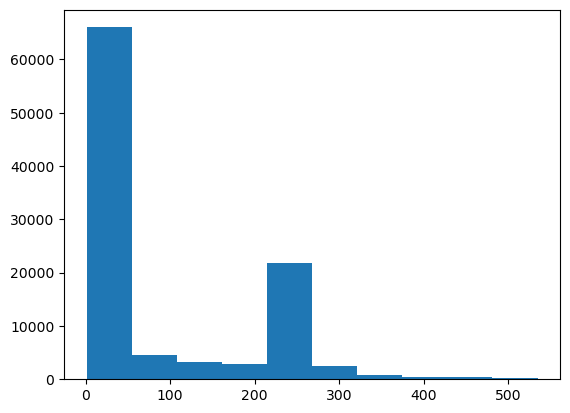

In [12]:
plt.hist(hoteldata.agent)

The agents are given an ID stored as a float... perhaps we leave the NaN's alone for now, or give it an out of range number like 999.
<br>
Meanwhile, we explore the numerical data.

In [13]:
hoteldata.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103886,0.398555,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


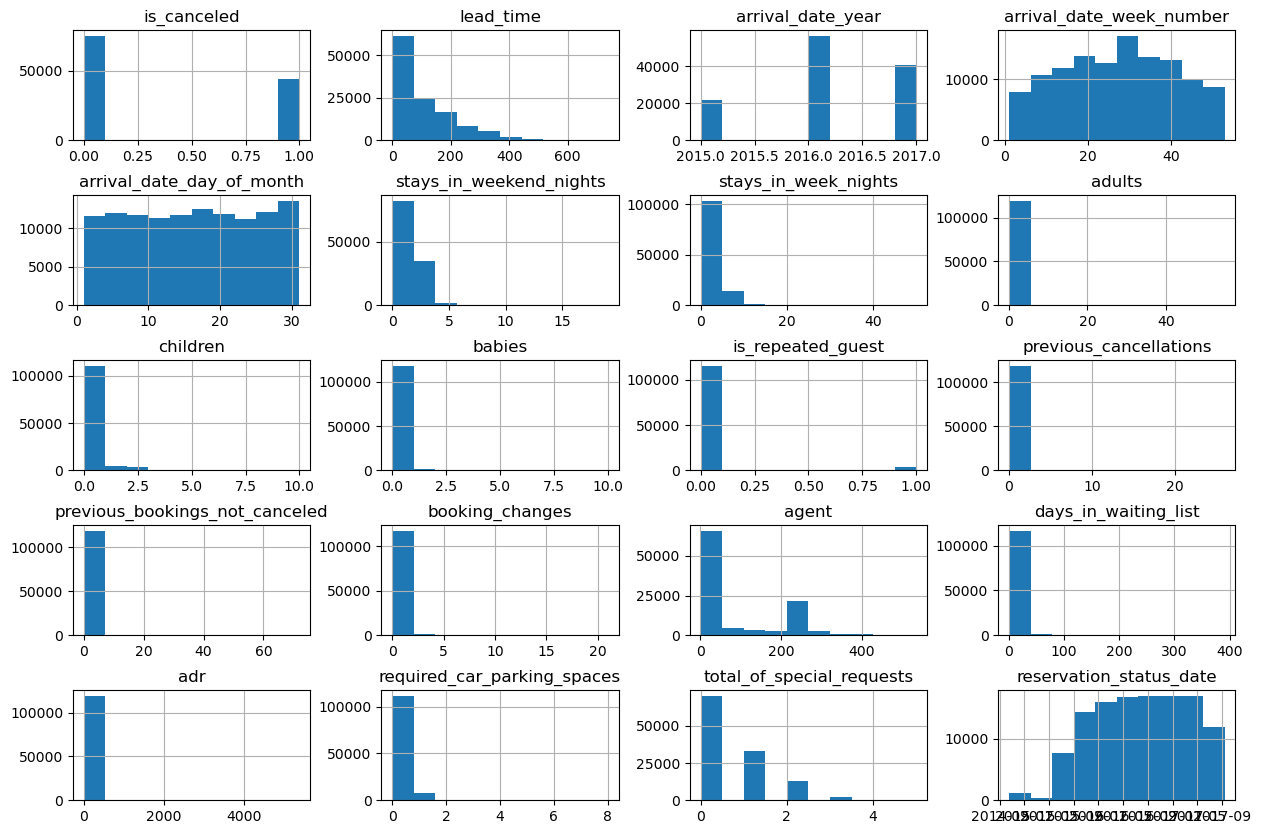

In [14]:
hoteldata.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);
#Hint: notice how the terminating ';' "swallows" some messy output and leads to a tidier notebook

According to the histograms, the following columns should be examined for right-skewed outliers:
<br>
'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'adr'.

<br>
The column 'booking_changes' is also right-skewed, but it makes sense. Most people make very little modifications to their bookings. So we can leave the column alone.

<br>
The number 'required_car_parking_spaces' seem to make sense too.

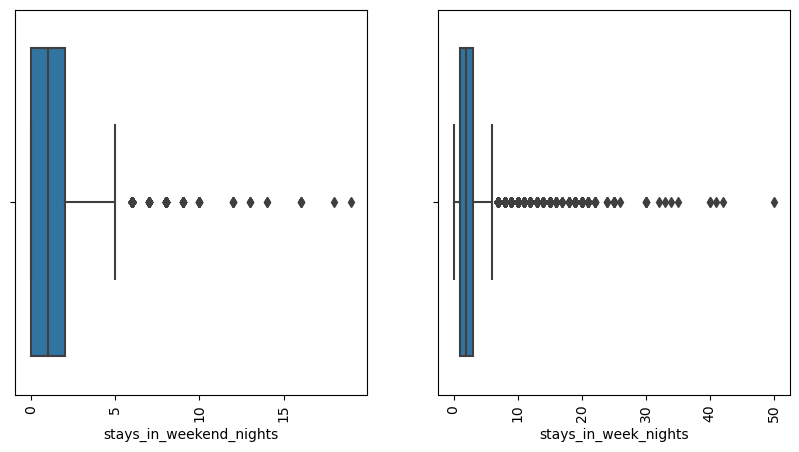

In [15]:
# 'stays_in_weekend_nights', 'stays_in_week_nights'

fig, axes = plt.subplots(1,2, figsize=(10,5))
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(['stays_in_weekend_nights', 'stays_in_week_nights']):
    sns.boxplot(data=hoteldata, x=col, ax=axes[i])
    
for ax in axes.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 90)
plt.show()

Stays for over 4 weekends or 11 weekday nights seem to be the outliers; we will take a look at them.

In [16]:
long_weekend = hoteldata.stays_in_weekend_nights > 4

pd.DataFrame({'count': hoteldata[long_weekend].stays_in_weekend_nights.value_counts(),\
              '%': hoteldata[long_weekend].stays_in_weekend_nights.value_counts()/len(hoteldata[long_weekend]) *100})\
.sort_values('count', ascending=False)

,count,%
6,153,44.476744
5,79,22.965116
8,60,17.441860
7,19,5.523256
9,11,3.197674
10,7,2.034884
12,5,1.453488
13,3,0.872093
16,3,0.872093
14,2,0.581395


Examine those who stayed 9-19 weekends

In [17]:
query = hoteldata.query('stays_in_weekend_nights > 9')
query

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1655,Resort Hotel,0,30,2015,September,37,7,13,33,2,...,17,No Deposit,240.0,0,Transient,0.00,0,1,Check-Out,2015-10-23
3820,Resort Hotel,1,122,2016,January,3,12,12,30,2,...,0,No Deposit,8.0,0,Transient,22.11,0,0,Canceled,2015-12-04
3850,Resort Hotel,0,214,2016,January,5,26,12,30,2,...,0,No Deposit,8.0,0,Transient,31.45,0,0,Check-Out,2016-03-08
9839,Resort Hotel,1,322,2017,January,2,10,16,40,2,...,0,No Deposit,8.0,0,Transient,25.50,0,0,Canceled,2016-10-31
14037,Resort Hotel,0,113,2015,August,31,1,18,42,1,...,0,No Deposit,NaN,0,Transient,110.50,0,3,Check-Out,2015-09-30
14038,Resort Hotel,0,126,2016,July,28,5,19,50,1,...,2,No Deposit,NaN,0,Transient,110.00,0,3,Check-Out,2016-09-12
20835,Resort Hotel,0,92,2016,January,2,7,10,25,1,...,0,No Deposit,2.0,0,Contract,36.93,0,0,Check-Out,2016-02-11
31404,Resort Hotel,0,148,2016,November,48,23,10,25,1,...,0,No Deposit,75.0,0,Transient,41.98,0,1,Check-Out,2016-12-28
32589,Resort Hotel,0,1,2017,February,5,3,13,32,1,...,2,No Deposit,NaN,0,Transient,42.11,0,3,Check-Out,2017-03-20
32946,Resort Hotel,0,140,2017,January,1,6,10,25,2,...,0,No Deposit,177.0,0,Transient,45.00,0,1,Check-Out,2017-02-10


Why are there longterm guests who stay for more than 9 weekends? In the US, most hotels, with the exception of extended stay hotels, allow guests to stay a maximum of 28 days, otherwise they are considered a tenant. Perhaps this is not the case in Europe? Or these hotels also allow extended stay? But I think this data should be kept. Same with weekday stay.

In [18]:
# 'adults', 'children', 'babies'

# take a look at resverations with more than 6 adults
hoteldata[hoteldata.adults >6].value_counts('adults')

adults
26    5
20    2
27    2
10    1
40    1
50    1
55    1
dtype: int64

In [19]:
hoteldata[hoteldata.adults>6]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1539,Resort Hotel,1,304,2015,September,36,3,0,3,40,...,0,No Deposit,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
1587,Resort Hotel,1,333,2015,September,36,5,2,5,26,...,0,No Deposit,96.0,0,Group,0.0,0,0,Canceled,2015-01-02
1643,Resort Hotel,1,336,2015,September,37,7,1,2,50,...,0,No Deposit,NaN,0,Group,0.0,0,0,Canceled,2015-01-18
1752,Resort Hotel,1,340,2015,September,37,12,2,5,26,...,0,No Deposit,96.0,0,Group,0.0,0,0,Canceled,2015-01-02
1884,Resort Hotel,1,347,2015,September,38,19,2,5,26,...,0,No Deposit,96.0,0,Group,0.0,0,0,Canceled,2015-01-02
1917,Resort Hotel,1,349,2015,September,39,21,1,3,27,...,0,No Deposit,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
1962,Resort Hotel,1,352,2015,September,39,24,1,3,27,...,0,No Deposit,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
2003,Resort Hotel,1,354,2015,September,39,26,2,5,26,...,0,No Deposit,96.0,0,Group,0.0,0,0,Canceled,2015-01-02
2164,Resort Hotel,1,361,2015,October,40,3,2,5,26,...,0,No Deposit,96.0,0,Group,0.0,0,0,Canceled,2015-01-02
2173,Resort Hotel,1,338,2015,October,41,4,2,0,55,...,0,No Deposit,NaN,0,Group,0.0,0,0,Canceled,2015-01-02


For reservations with more than 5 adults, they are group reservations for the resort hotel with dates in September or October with no deposit. All these reservations are from local guests, have a long lead time, and have been cancelled. Perhaps these guest were planning to book for a special event, like a wedding.
<br>
This suggests that the number of guests and lead time may be features to consider in predicting cancellations.

In [20]:
# according to the histograms above, the outliers for children and babies seem to be more than 3
hoteldata[(hoteldata.children >3) | (hoteldata.babies >3)][['adults', 'children', 'babies']]

,adults,children,babies
328,2,10.0,0
46619,2,0.0,10
78656,1,0.0,9


That is an extreme number of babies and children just for 2 adults. Is this even possible? It could be an input error (e.g: they mean to type '1' instead of '10').
<br>
We will drop these rows, since there are only 3 of them.

In [21]:
children_drop = (hoteldata.children >3) | (hoteldata.babies >3)
hoteldata = hoteldata[~children_drop]

In [22]:
hoteldata.shape #sanity check to see that the columns are not affected

(119387, 31)

In [23]:
print('max number of children: ',hoteldata.children.max())
print('max number of babies: ',hoteldata.babies.max()) # everything checks out

max number of children:  3.0
max number of babies:  2


<AxesSubplot:xlabel='previous_cancellations'>

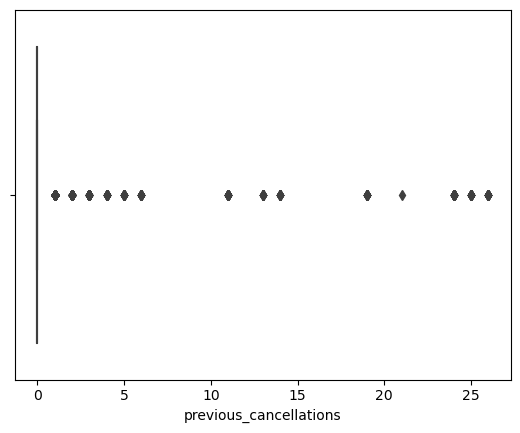

In [24]:
# previous_cancellations

sns.boxplot(data=hoteldata, x='previous_cancellations', hue='is_canceled')

Outliers seem to be after 0. However, the tail goes past 25; we will look at that.

In [25]:
len(hoteldata[hoteldata.previous_cancellations > 25])
hoteldata[hoteldata.previous_cancellations > 25]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14779,Resort Hotel,1,275,2015,October,41,4,2,0,2,...,0,Non Refund,208.0,0,Transient,50.0,0,0,Canceled,2015-01-30
14780,Resort Hotel,1,275,2015,October,41,4,2,0,2,...,0,Non Refund,208.0,0,Transient,50.0,0,0,Canceled,2015-01-30
14781,Resort Hotel,1,275,2015,October,41,4,2,0,2,...,0,Non Refund,208.0,0,Transient,50.0,0,0,Canceled,2015-01-30
14782,Resort Hotel,1,275,2015,October,41,4,2,0,2,...,0,Non Refund,208.0,0,Transient,50.0,0,0,Canceled,2015-01-30
14783,Resort Hotel,1,275,2015,October,41,4,2,0,2,...,0,Non Refund,208.0,0,Transient,50.0,0,0,Canceled,2015-01-30
14784,Resort Hotel,1,275,2015,October,41,4,2,0,2,...,0,Non Refund,208.0,0,Transient,50.0,0,0,Canceled,2015-01-30
14785,Resort Hotel,1,275,2015,October,41,4,2,0,2,...,0,Non Refund,208.0,0,Transient,50.0,0,0,Canceled,2015-01-30
14786,Resort Hotel,1,275,2015,October,41,4,2,0,2,...,0,Non Refund,208.0,0,Transient,50.0,0,0,Canceled,2015-01-30
14787,Resort Hotel,1,275,2015,October,41,4,2,0,2,...,0,Non Refund,208.0,0,Transient,50.0,0,0,Canceled,2015-01-30
14788,Resort Hotel,1,275,2015,October,41,4,2,0,2,...,0,Non Refund,208.0,0,Transient,50.0,0,0,Canceled,2015-01-30


The indices look consecutive, and at quick glance, it's possible these are 26 identical bookings the same person.
<br>
Let's see how many previous cancellations these bookings have.

In [26]:
hoteldata[hoteldata.previous_cancellations > 25].value_counts('previous_cancellations')

previous_cancellations
26    26
dtype: int64

In [27]:
# confirm that those 26 rows are indeed duplicates

hoteldata[hoteldata.previous_cancellations > 25].duplicated().value_counts()

True     25
False     1
dtype: int64

All 26 of these bookings had 26 previous cancellations with the exact same values. Are these identical bookings, a glitch on the booking website, or they are all different bookings from different people on the same day?
<br>
We will perform value counts on previous cancellations.

In [28]:
hoteldata[(hoteldata.previous_cancellations > 0)].value_counts('previous_cancellations')

previous_cancellations
1     6051
2      116
3       65
24      48
11      35
4       31
26      26
25      25
6       22
5       19
19      19
14      14
13      12
21       1
dtype: int64

We see the same count for 25, 19, and 14 previous cancellations. However, there is only one reservation with 21 previous cancellations, suggesting that those 26 rows with 26 previous cancellations might just be a coincidence. We will not drop any seemingly duplicate rows. Especially since we do not have information of the ID's of the people who booked them.

We now plot those with more than 10 previous cancellations, and see if there seems to be a relationship with cancellations based on the previous number of cancellations.

<AxesSubplot:xlabel='previous_cancellations', ylabel='count'>

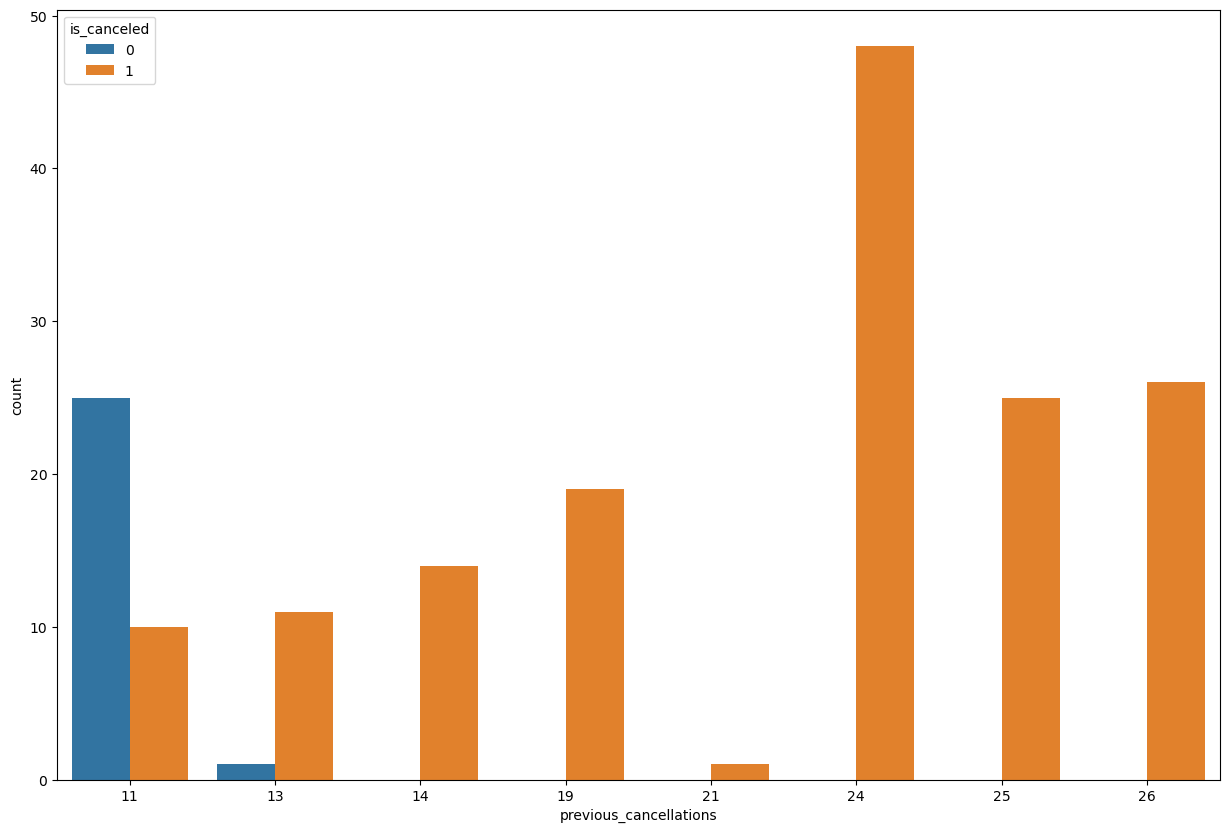

In [29]:
plt.subplots(figsize=(15,10))
sns.countplot(data=hoteldata[hoteldata.previous_cancellations > 10], x='previous_cancellations', hue='is_canceled')

It seems like bookings with large number of previous cancellations are more likely to cancel.

In [30]:
# useful extra columns to have?
# arrival date = year/month/day of month
# cxl/checkout date = resv status date
# 1st resv date = arrival date - lead time
# nights_stayed = weeknights + weekends

In [31]:
# 2015 data starts in the middle of the year? Starts on Week 27 (July 1st) while 2016, 2017 starts in January
hoteldata[hoteldata.arrival_date_year == 2017].sort_values('arrival_date_week_number').head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
9775,Resort Hotel,1,74,2017,January,1,1,1,0,2,...,0,No Deposit,5.0,0,Transient,57.60,0,0,Canceled,2016-10-20
104129,City Hotel,0,29,2017,January,1,2,1,3,2,...,0,No Deposit,9.0,0,Transient,129.70,0,1,Check-Out,2017-01-06
104130,City Hotel,0,19,2017,January,1,2,1,3,2,...,1,No Deposit,9.0,0,Transient,96.90,0,2,Check-Out,2017-01-06
104131,City Hotel,0,89,2017,January,1,3,0,3,2,...,0,No Deposit,9.0,0,Transient,127.80,0,1,Check-Out,2017-01-06
104132,City Hotel,0,17,2017,January,1,1,2,3,1,...,0,No Deposit,9.0,0,Transient,103.52,0,1,Check-Out,2017-01-06


<AxesSubplot:xlabel='days_in_waiting_list', ylabel='Count'>

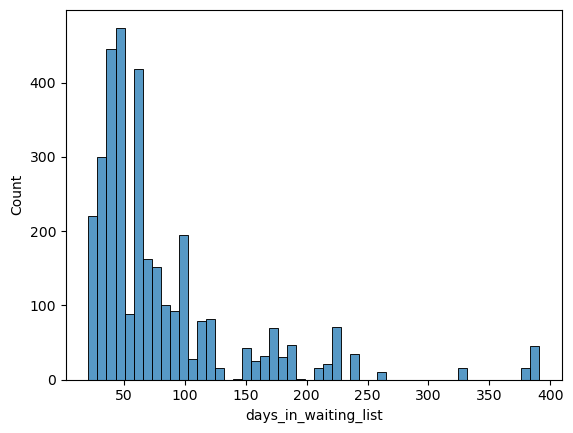

In [32]:
# outliers on the waiting list

sns.histplot(data=hoteldata[hoteldata.days_in_waiting_list>20], x='days_in_waiting_list')

In [33]:
# very high booking changes
hoteldata[hoteldata.booking_changes>15].T

,1655,9106,41020,51964,88017,111682,111689
hotel,Resort Hotel,Resort Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel
is_canceled,0,1,0,0,0,0,0
lead_time,30,206,0,159,16,330,330
arrival_date_year,2015,2016,2015,2016,2016,2017,2017
arrival_date_month,September,October,August,May,March,May,May
arrival_date_week_number,37,44,33,22,11,19,19
arrival_date_day_of_month,7,27,10,26,11,11,11
stays_in_weekend_nights,13,2,9,0,14,0,0
stays_in_week_nights,33,5,20,3,35,3,3
adults,2,2,0,2,0,2,2


<AxesSubplot:xlabel='adr', ylabel='Count'>

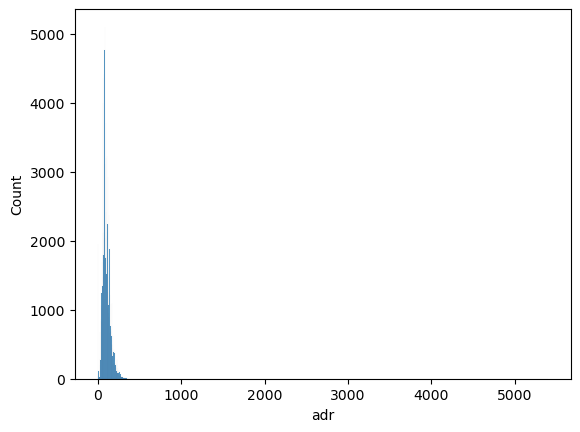

In [34]:
sns.histplot(data=hoteldata, x='adr')

In [35]:
# from hoteldata.describe() above, min(adr) < 0. This is impossible b/c of how adr is defined.
# drop it
hoteldata = hoteldata[hoteldata.adr >= 0]

On the plot above, it seems like that any ADR value over 400 is an outlier. 

In [36]:
#hoteldata[hoteldata.adr>400].T

<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

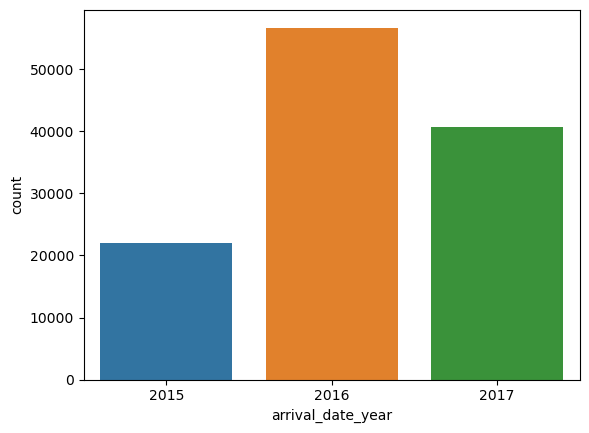

In [37]:
sns.countplot(data=hoteldata, x='arrival_date_year')

In [38]:
for year in [2015, 2016, 2017]:
    print(year)
    print('starting week number is ' + str(hoteldata[hoteldata.arrival_date_year == year].arrival_date_week_number.\
                                       sort_values(ascending=True).iloc[0]))

2015
starting week number is 27
2016
starting week number is 1
2017
starting week number is 1


We see that we have more than twice as many bookings in 2016, 2017 than in 2015. This is because the 2015 bookings collected all had their arrival date starting on Week 27 (July 1st), while the others all start on January 1st.

In [39]:
for year in [2015, 2016, 2017]:
    print(year)
    print('ending week number is ' + str(hoteldata[hoteldata.arrival_date_year == year].arrival_date_week_number.\
                                       sort_values(ascending=False).iloc[0]))

2015
ending week number is 53
2016
ending week number is 53
2017
ending week number is 35


However, the bookings collected from year 2017 end at Week 35 (mid September). This probably explains why there are less bookings in 2017 than in 2016.

In [40]:
# back to filling the NaN's for the agent column:

# check is there's an agent id of 999
len(hoteldata[hoteldata.agent==999]) # there is none

# fill NaN with 999 -- this shall represent 'No Agent'
hoteldata.agent.fillna(999, inplace=True)

In [41]:
# double check if there are null values

hoteldata.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [42]:
hoteldata.shape

(119386, 31)

In [43]:
# save file as csv
#datagy.io/pandas-dataframe-to-csv/#Working-with-Dataframe-Index-When-Exporting-Pandas-to-CSV

hoteldata.to_csv('bookings_wrangled.csv')

## **Summary**

The original shape of the data was 119390 rows, 32 columns. We removed the 'company' column because about 94% of it had missing values. Next, we filled the missing values for the 'country' column with the code 'XXX' to denote unknown country. We removed 3 rows because they did not make sense -- each observation was 1-2 adults with 9-10 children or babies, which is an unlikely scenario. We assumed the 4 missing values in the 'children' meant 0 and that the guests did not fill that part in. Finally, we dropped all rows where adr < 0, because that's impossible.
<br>
While exploring the data, we notice there might be a relationship between 'previous_cancellations' and our target vari

In the end of this notebook, there were 119386 rows and 31 columns. The target feature is 'is_canceled'.

<br>
Next, we will one-hot-encode the categorical variables and continue with EDA.